#Mohanlal Mammooty Classifier

As the name suggests, in this notebook we are going to create a deep learning model that classifies whether a picture given to it is either the picture of Actor MohanLal or Mammootty.

The dataset has been taken from Kaggle and the link is https://www.kaggle.com/fillerink/mohanlal-mammooty-images

##Importing libraries and dataset

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
#uploading the file
from google.colab import files

files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
#unzipping the content
!unzip dataset.zip

##Exploring our dataset

In [ ]:
os.listdir("/content/dataset")

['mammooty', 'mohanlal']

In [ ]:
mammootty_path = "/content/dataset/mammooty/mammooty"
mohanlal_path = "/content/dataset/mohanlal/mohanlal"

In [ ]:
print("Number of Mammootty pictures:",len(os.listdir(mammootty_path)))
print("Number of MohanLal pictures:",len(os.listdir(mohanlal_path)))

Number of Mammootty pictures: 1971
Number of MohanLal pictures: 2569


In [ ]:
nrows = 4
ncols = 4

pic_index = 0

In [ ]:
mammootty_fnames = os.listdir( mammootty_path )
mohanlal_fnames = os.listdir( mohanlal_path )

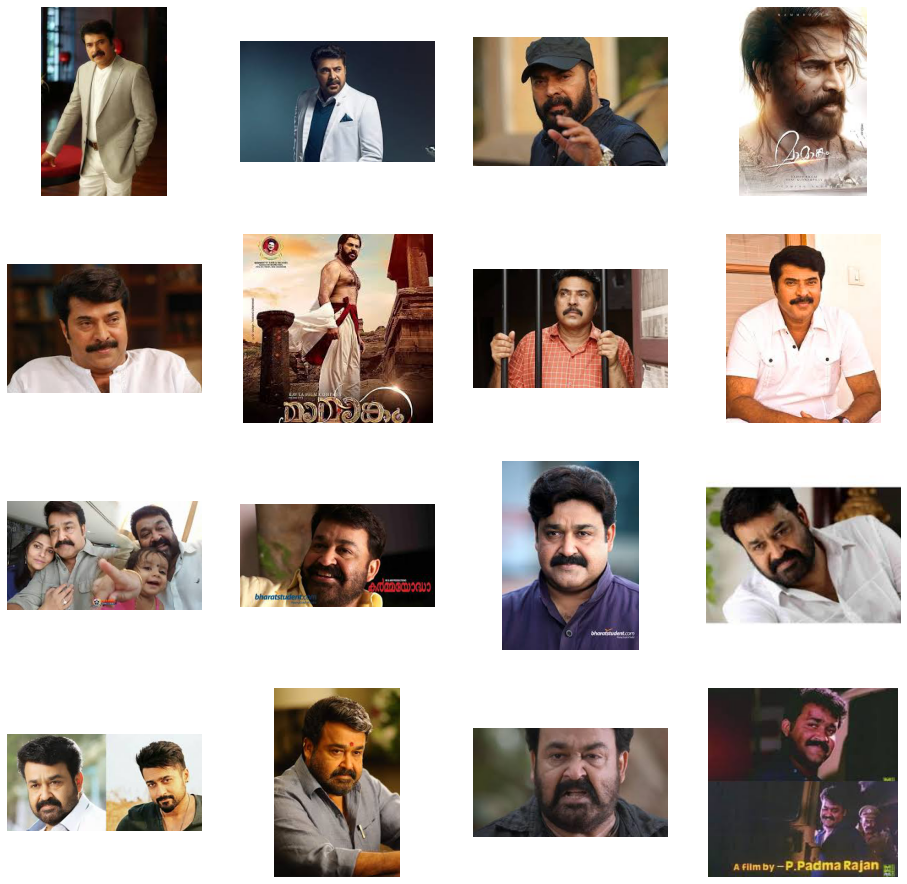

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

mammootty_pix = [os.path.join(mammootty_path, fname) 
                for fname in mammootty_fnames[ pic_index-8:pic_index] 
               ]

mohanlal_pix = [os.path.join(mohanlal_path, fname) 
                for fname in mohanlal_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(mammootty_pix+mohanlal_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

##Creating a model

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

##Preprocessing and training model

In [ ]:
batch_size = 16
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/dataset',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/dataset', # same directory as training data
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

history=model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 70)


Found 3633 images belonging to 2 classes.
Found 907 images belonging to 2 classes.
Epoch 1/70
227/227 [==============================] - 25s 106ms/step - loss: 0.7798 - accuracy: 0.5757 - val_loss: 0.6840 - val_accuracy: 0.6071
Epoch 2/70
227/227 [==============================] - 24s 104ms/step - loss: 0.6871 - accuracy: 0.5371 - val_loss: 0.6630 - val_accuracy: 0.5893
Epoch 3/70
227/227 [==============================] - 24s 104ms/step - loss: 0.6588 - accuracy: 0.6157 - val_loss: 0.6487 - val_accuracy: 0.6306
Epoch 4/70
227/227 [==============================] - 24s 104ms/step - loss: 0.6409 - accuracy: 0.6412 - val_loss: 0.6424 - val_accuracy: 0.6529
Epoch 5/70
227/227 [==============================] - 23s 103ms/step - loss: 0.6302 - accuracy: 0.6469 - val_loss: 0.6213 - val_accuracy: 0.6484
Epoch 6/70
227/227 [==============================] - 23s 103ms/step - loss: 0.5980 - accuracy: 0.6783 - val_loss: 0.6640 - val_accuracy: 0.6562
Epoch 7/70
227/227 [===========================

##Saving the model

In [ ]:
model.save("mandmclass.h5")

In [ ]:
new_model = tf.keras.models.load_model('/content/mandmclass.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

In [ ]:
!ls -l --block-size=M

total 106M
drwxr-xr-x 4 root root  1M May 23 04:02 dataset
-rw-r--r-- 1 root root 34M May 23 04:02 dataset.zip
-rw-r--r-- 1 root root 73M May 23 05:14 mandmclass.h5
drwxr-xr-x 1 root root  1M May  6 13:44 sample_data


##Converting model to json format

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 6.0MB/s 
     |████████████████████████████████| 112kB 15.0MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [ ]:
!tensorflowjs_converter --input_format=keras /content/mandmclass.h5 /content/my_model

2021-05-23 05:15:05.970095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
